In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
columns = ['sepal_comprimento','sepal_largura','petal_comprimento','petal_largura','tipo']
df = pd.read_csv('iris-dataset.csv', names=columns);

In [3]:
df.head()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_comprimento    150 non-null float64
sepal_largura        150 non-null float64
petal_comprimento    150 non-null float64
petal_largura        150 non-null float64
tipo                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
df['tipo'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: tipo, dtype: int64

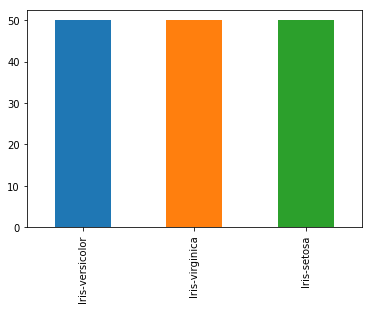

In [7]:
df['tipo'].value_counts().plot(kind='bar');

### Separacao feature e label

In [8]:
X = df.values[:, :-1]
y = df.values[:, -1]

### Separando train e test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.9, random_state=42, stratify=y);

## Metricas

In [10]:
# def accuracy(y, y_pred):
#     return np.sum(y == y_pred) / y_pred.shape[0]

In [140]:
# def presicion(y,pred):
#     mc = confusion_matrix(y_test, pred,labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
#     dfmc = pd.DataFrame(mc)
#     TP = mc.diagonal()
#     FP = []
#     for i in range(dfmc.shape[0]):
#         FP.append(dfmc[i].sum() - mc.diagonal()[i])
#     FP = np.array(FP)

#     FN = []
#     for i in range(dfmc.shape[0]):
#         FN.append(dfmc.values[i].sum() - mc.diagonal()[i])
#     FN = np.array(FN)
#     return TP.sum()/(TP.sum()+FP.sum())

# Regresao Logistica

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
LR = LogisticRegression(multi_class='auto', solver='lbfgs')

In [13]:
LR.fit(X_train,y_train)
pred = LR.predict(X_test)

In [227]:
metrics.accuracy(y_test,pred),metrics.precision(y_test,pred), metrics.recall(y_test,pred), metrics.f1_measure(y_test,pred)

(0.9703703703703703,
 0.9703703703703703,
 0.9703703703703703,
 0.9703703703703703)

# Testes

# Criando matrix de confusao

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
mc = confusion_matrix(y_test, pred,labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
mc

array([[45,  0,  0],
       [ 0, 42,  3],
       [ 0,  1, 44]])

In [17]:
mc.diagonal(offset=-1)

array([0, 1])

In [18]:
mc.shape[0],mc.shape[1]

(3, 3)

In [19]:
pd.crosstab(y_test,pred,rownames=['Real'],colnames=['Predict'],margins=True)

Predict,Iris-setosa,Iris-versicolor,Iris-virginica,All
Real,,,,
Iris-setosa,45,0,0,45
Iris-versicolor,0,42,3,45
Iris-virginica,0,1,44,45
All,45,43,47,135


In [20]:
TP = mc.diagonal()

In [28]:
TP

array([45, 42, 44])

In [25]:
dfmc = pd.DataFrame(mc)

https://medium.com/as-m%C3%A1quinas-que-pensam/m%C3%A9tricas-comuns-em-machine-learning-como-analisar-a-qualidade-de-chatbots-inteligentes-conceitos-a5b586053973

In [223]:
presicion(y_test,pred)

0.9703703703703703

In [224]:
from ml_libs import metricas
from importlib import reload
reload(metricas)

<module 'ml_libs.metricas' from '/home/michel/Documentos/Machine-Learning/Lista 8/ml_libs/metricas.py'>

In [225]:
metrics = metricas.metricas()

In [226]:
metrics.accuracy(y_test,pred),metrics.precision(y_test,pred), metrics.recall(y_test,pred), metrics.f1_measure(y_test,pred)

(0.9703703703703703,
 0.9703703703703703,
 0.9703703703703703,
 0.9703703703703703)